In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [2]:
df=pd.read_csv(r'C:/Users/Faith/Desktop/Guvi_recordings/cancer.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 33)

In [5]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

# checking for null values

In [6]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

# Removing the column that has null values 

In [7]:
df.drop(['Unnamed: 32','id'], axis=1,inplace=True)

In [8]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# Descriptive statistics

In [10]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [12]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

## Data Visualizations

In [13]:
data_mean=df.iloc[:,1:11]
data_se=df.iloc[:,11:21]
data_worst=df.iloc[:,23:]

<AxesSubplot:title={'center':'Breast Cancer Feature Correlation of  Mean Radius'}>

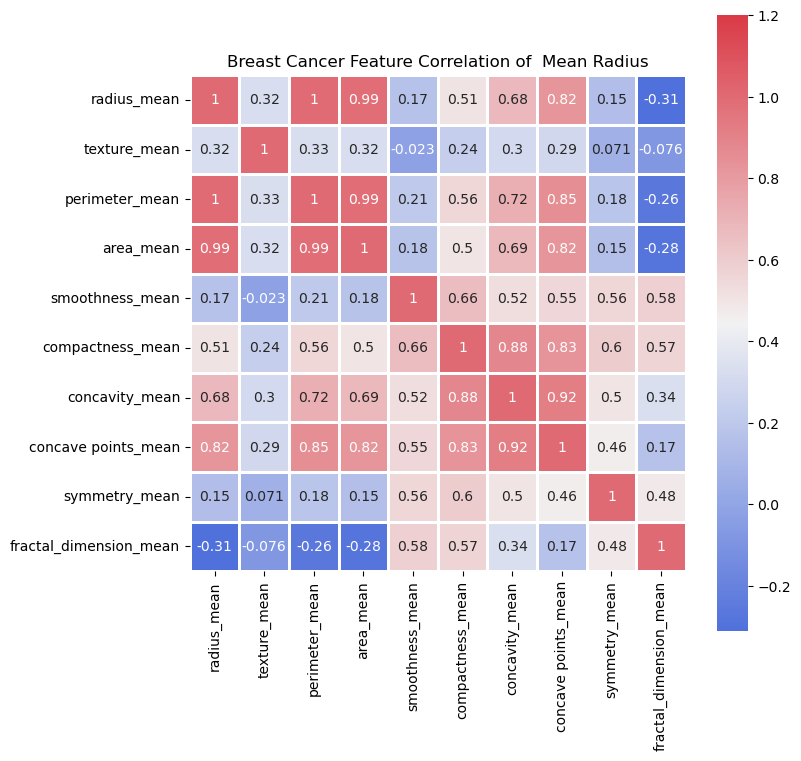

In [14]:
corr = data_mean.corr()
# Set up the matplotlib figure
data_mean, ax = plt.subplots(figsize=(8, 8))
plt.title('Breast Cancer Feature Correlation of  Mean Radius')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, 
            ax=ax,annot=True, fmt='.2g',linewidths=2)

<AxesSubplot:title={'center':'Breast Cancer Feature Correlation of Radius Error'}>

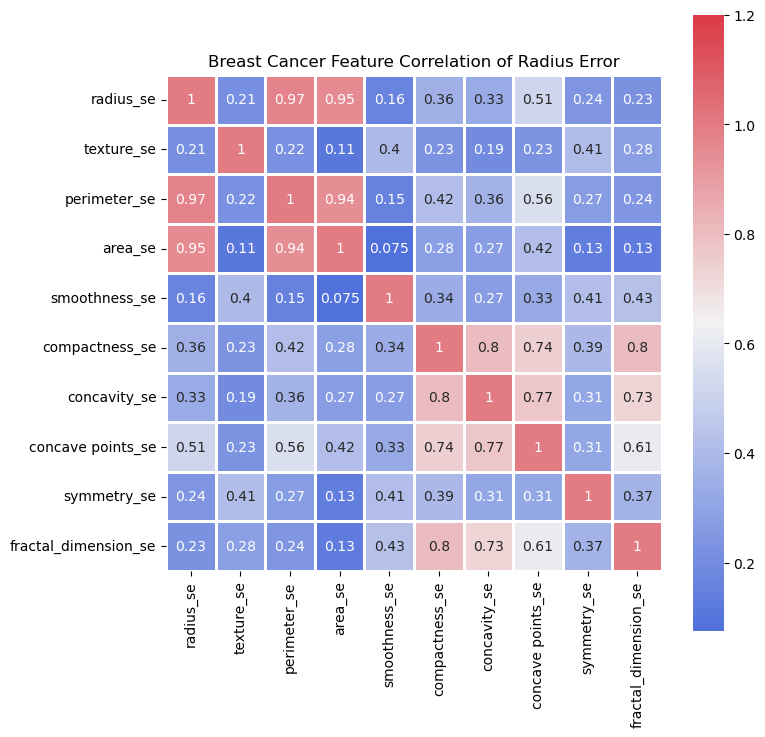

In [15]:
corr = data_se.corr()
# Set up the matplotlib figure
data_se, ax = plt.subplots(figsize=(8, 8))
plt.title('Breast Cancer Feature Correlation of Radius Error')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, 
            ax=ax,annot=True, fmt='.2g',linewidths=2)

<AxesSubplot:title={'center':'Breast Cancer Feature Correlation of Worst Radius.'}>

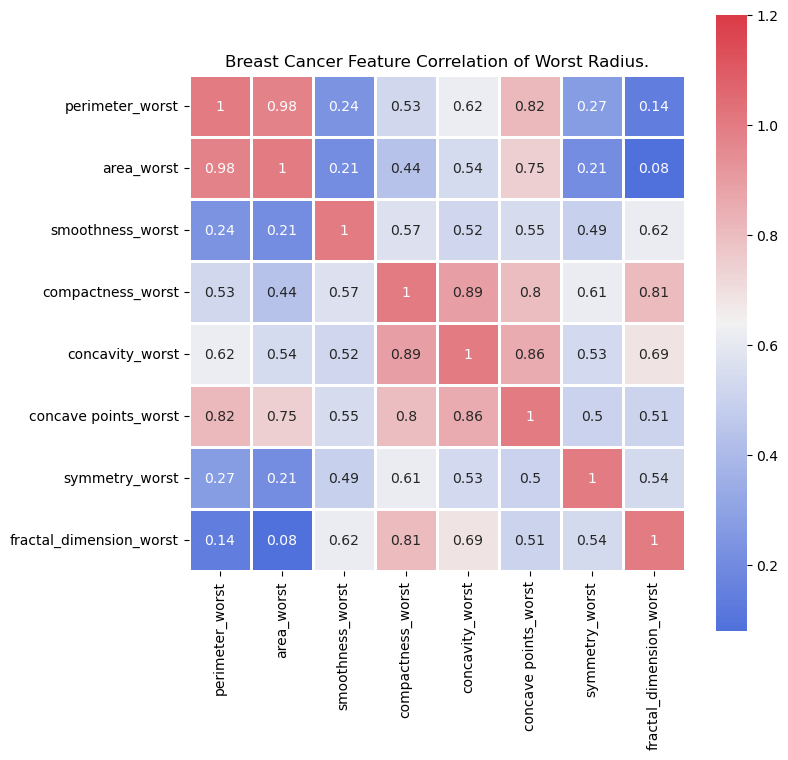

In [16]:
corr = data_worst.corr()
# Set up the matplotlib figure
data_worst, ax = plt.subplots(figsize=(8, 8))
plt.title('Breast Cancer Feature Correlation of Worst Radius.')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, 
            ax=ax,annot=True, fmt='.2g',linewidths=2)

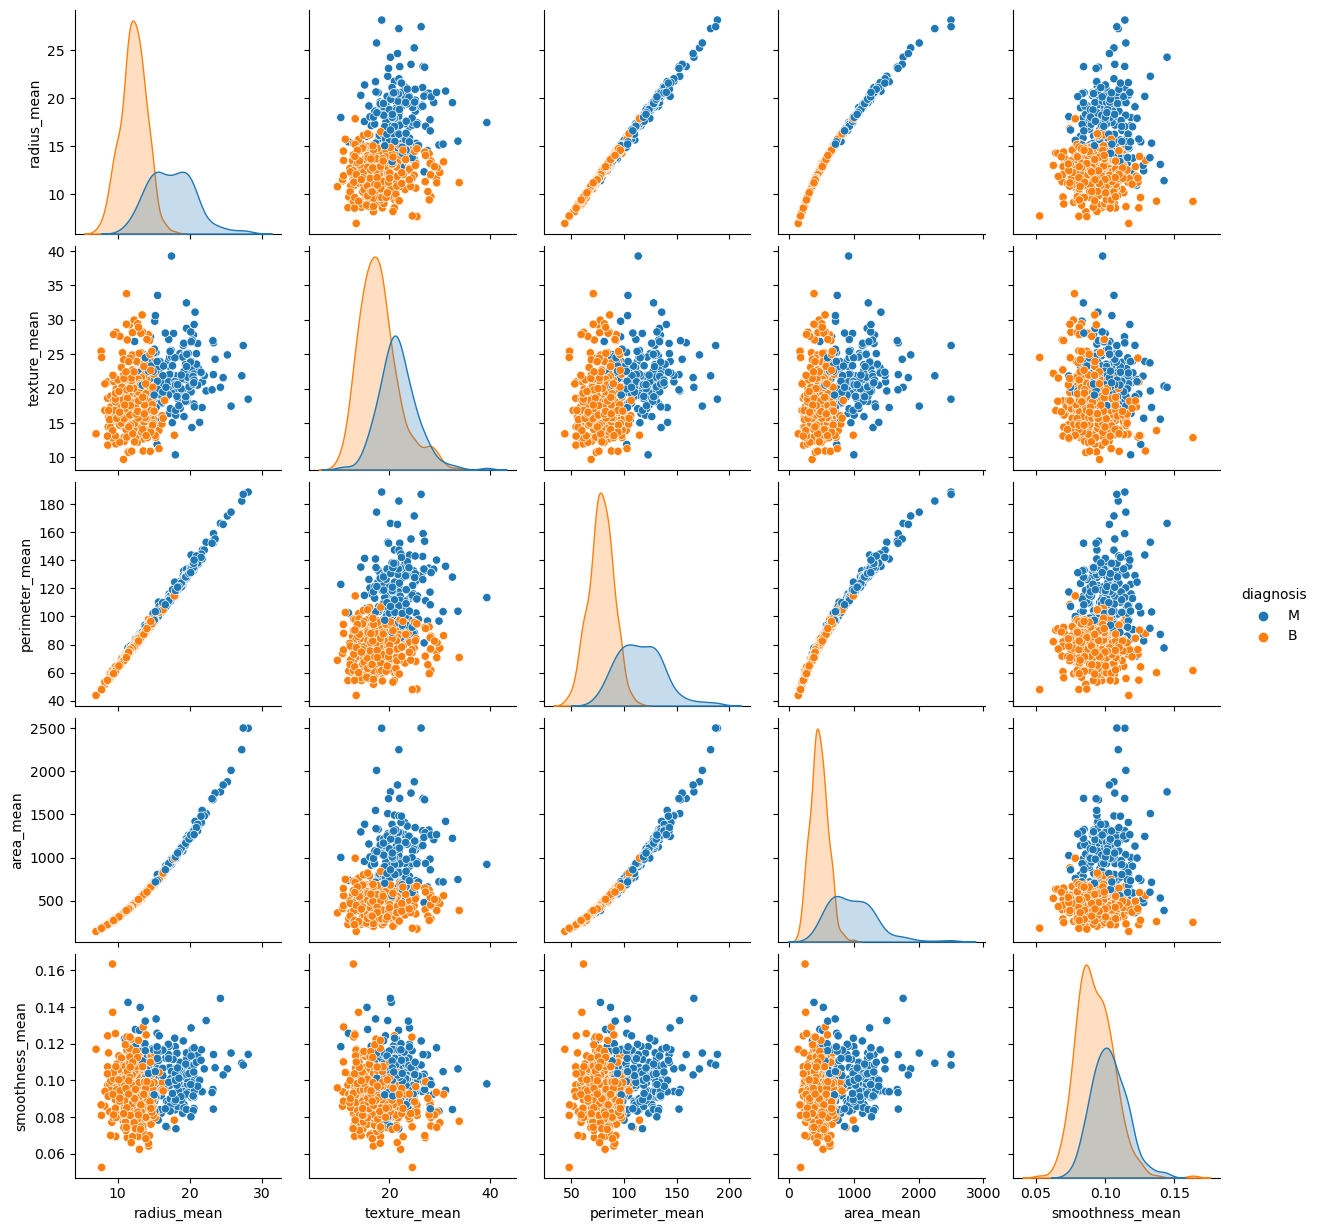

In [17]:
sns.pairplot(df.iloc[:,0:6],hue="diagnosis")

<AxesSubplot:>

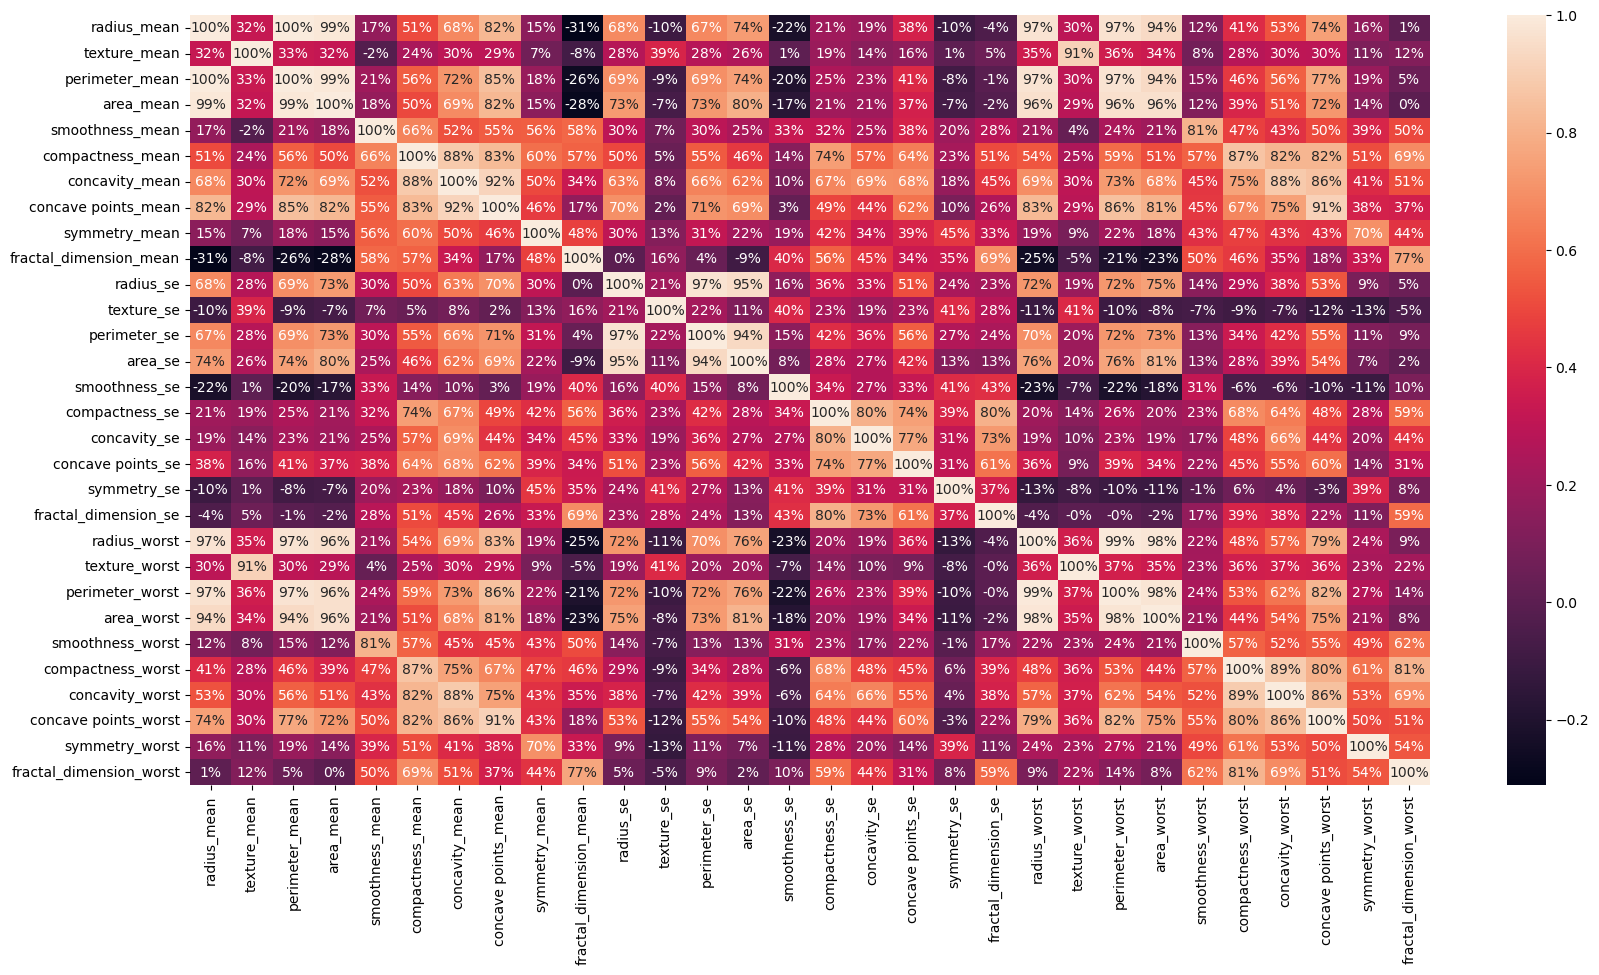

In [18]:
# Fully visualize the correlation
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,fmt=".0%")

# Encoding categorical data values

In [19]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(df['diagnosis'])
df['diagnosis']=labelencoder_Y.fit_transform(df['diagnosis'])

In [20]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [21]:
X=df.iloc[:,1:31]
Y=df.iloc[:,0]

In [22]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [23]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

# Feature Standardization

In [24]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xs = ss.fit_transform(X)

# #Feature extraction using principal component analysis (PCA)

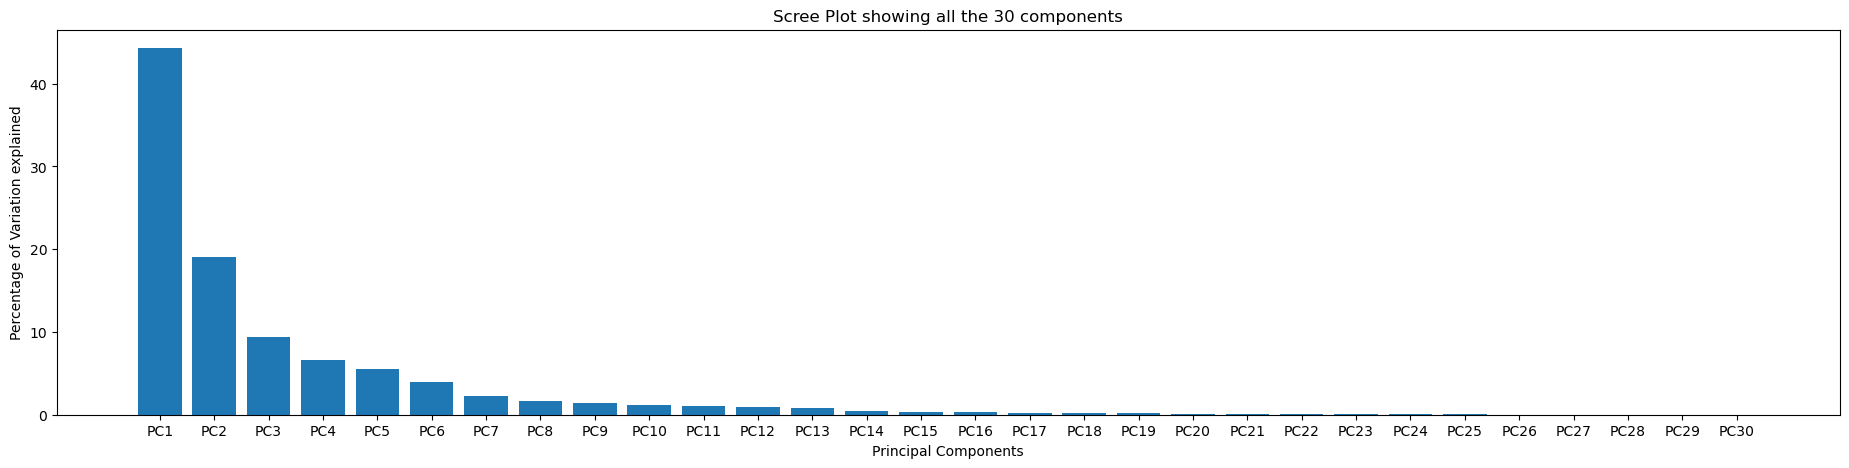

In [43]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(Xs)

#now based on the scree plot we see how many principal components are actually needed
percent_var = np.round(pca.explained_variance_ratio_*100, decimals=1)   #calculating the percentage of variation that each principal component accounts for
labels = ['PC'+str(p) for p in range(1,len(percent_var)+1)]

#plotting the graph to see contribution of each principal component
f, ax = plt.subplots(figsize=(23,5))
plt.bar(x=range(1,len(percent_var)+1), height=percent_var, tick_label=labels)
plt.xlabel('Principal Components')
plt.ylabel('Percentage of Variation explained')
plt.title('Scree Plot showing all the 30 components')
plt.show()

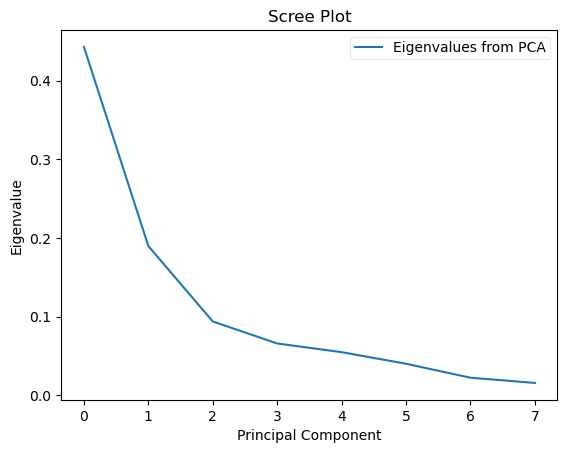

In [38]:
plt.plot(var)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
leg = plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.3,shadow=False,markerscale=0.4)
leg.get_frame().set_alpha(0.4)
plt.show()

C:\Users\Faith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


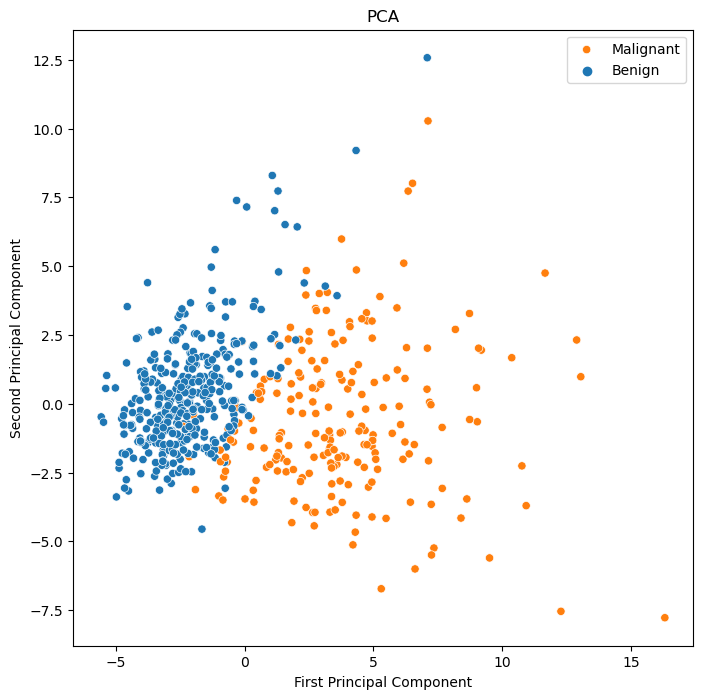

In [39]:
#performing the principal component analysis with 3 components as there is not much decrease in 
pca = PCA(n_components=3)
fit = pca.fit(Xs)
X_pca = pca.transform(Xs)
plt.figure(figsize=(8, 8))
#using just 2 principal components for the ease of visualization
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=df['diagnosis'])
plt.title("PCA")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend(['Malignant','Benign'])

# Splitting the dataset into the Training set and Test set

In [44]:
X = X_pca
y = df['diagnosis']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [46]:
# Using GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
model  = SVC()

params = {"kernel":['linear', 'poly', 'rbf'],
         "degree":[1,2,3,4],
         "gamma":[0.1, 1,.001],
         "C":[0.001, 0.01, 0.1, 1, 10, 100]}
svm_rs = GridSearchCV(model, params, cv=10, n_jobs=-1, verbose=True)
svm_rs.fit(x_train, y_train)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'degree': [1, 2, 3, 4], 'gamma': [0.1, 1, 0.001],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=True)

In [47]:
svm_rs.best_params_

{'C': 100, 'degree': 1, 'gamma': 0.001, 'kernel': 'rbf'}

# Training with the best model

In [57]:
sv1 = SVC(kernel="rbf", degree=1,gamma=0.001, C=100, probability=True)

sv1.fit(x_train, y_train)

print("Train score :", sv1.score(x_train, y_train))
print("Test score :", sv1.score(x_test, y_test))

Train score : 0.9882629107981221
Test score : 0.9790209790209791


In [58]:
pred_test = sv1.predict(x_test)

# SVM  Model Evaluation

In [59]:
from sklearn import metrics
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        90
           1       0.98      0.96      0.97        53

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [61]:
metrics.roc_auc_score(y_test, pred_test)

0.9755765199161427

In [62]:
model_report = pd.DataFrame()

tmp = pd.Series({'Model': " Support Vector Machine ",
                 'ROC Score' : metrics.roc_auc_score(y_test, pred_test),
                 'Precision Score': metrics.precision_score(y_test, pred_test),
                 'Recall Score': metrics.recall_score(y_test, pred_test),
                 'F1 Score' : metrics.f1_score(y_test, pred_test),
                 'Accuracy Score': metrics.accuracy_score(y_test, pred_test)})

model_svm_report = model_report.append(tmp, ignore_index = True)
model_svm_report

C:\Users\Faith\AppData\Local\Temp\ipykernel_4816\4096327640.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_svm_report = model_report.append(tmp, ignore_index = True)


,Model,ROC Score,Precision Score,Recall Score,F1 Score,Accuracy Score
0,Support Vector Machine,0.975577,0.980769,0.962264,0.971429,0.979021


# #Random Forest Classifier

In [89]:
param_dist = {'max_depth':[3,5,7],
              'min_samples_split':[20,25],
              'n_estimators':[50,100],
              'bootstrap': [True, False],
              'max_features': ['auto', 'log2'],
              'criterion': ['entropy', 'gini']}

fit_rf = RandomForestClassifier(random_state=42)

cv_rf = GridSearchCV(fit_rf, cv = 5, param_grid= param_dist, n_jobs = -1, verbose=1)

cv_rf.fit(x_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 5, 7],
                         'max_features': ['auto', 'log2'],
                         'min_samples_split': [20, 25],
                         'n_estimators': [50, 100]},
             verbose=1)

In [90]:
cv_rf.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'log2',
 'min_samples_split': 25,
 'n_estimators': 100}

# Training with the best model

In [91]:
rf =RandomForestClassifier(n_estimators = 100,
                           max_depth = 7, 
                           criterion = 'entropy',
                           min_samples_split = 25,
                           max_features = 'log2',
                           bootstrap = True)

rf.fit(x_train, y_train)

print("Train Accuracy :", rf.score(x_train,y_train))
print("Test Accuracy :", rf.score(x_test,y_test))

Train Accuracy : 0.9812206572769953
Test Accuracy : 0.9020979020979021


In [92]:
pred_test_rf = rf.predict(x_test)

In [93]:
tmp1 = pd.Series({'Model': " Random Forest Classifier ",
                 'ROC Score' : metrics.roc_auc_score(y_test, pred_test_rf),
                 'Precision Score': metrics.precision_score(y_test, pred_test_rf),
                 'Recall Score': metrics.recall_score(y_test, pred_test_rf),
                 'F1 Score' : metrics.f1_score(y_test, pred_test_rf),
                 'Accuracy Score': metrics.accuracy_score(y_test, pred_test_rf)})

model_rf_report = model_report.append(tmp1, ignore_index = True)
model_rf_report

C:\Users\Faith\AppData\Local\Temp\ipykernel_4816\2413036219.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_rf_report = model_report.append(tmp1, ignore_index = True)


,Model,ROC Score,Precision Score,Recall Score,F1 Score,Accuracy Score
0,Random Forest Classifier,0.90283,0.842105,0.90566,0.872727,0.902098


# Bagging Classifier

In [105]:
param_dist1 = {'n_estimators':[150,200,250],
              'bootstrap': [True],
              'max_features': [1,2,3,5,10],
              'max_samples' : [15,20,25,30]}

fit_bagging = BaggingClassifier(random_state = 1)

cv_bagging = GridSearchCV(fit_bagging, cv = 5, param_grid= param_dist1, n_jobs = -1, verbose = 1)

cv_bagging.fit(x_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_features': [1, 2, 3, 5, 10],
                         'max_samples': [15, 20, 25, 30],
                         'n_estimators': [150, 200, 250]},
             verbose=1)

In [106]:
cv_bagging.best_params_

{'bootstrap': True, 'max_features': 10, 'max_samples': 30, 'n_estimators': 150}

In [108]:
bagging = BaggingClassifier(n_estimators=150,max_samples=30, max_features=10, bootstrap=True, random_state=1)
bagging.fit(x_train, y_train)
print('Train_accuracy', bagging.score(x_train, y_train))
print('Test_accuracy', bagging.score(x_test, y_test))

Train_accuracy 0.9342723004694836
Test_accuracy 0.9090909090909091


In [109]:
test_pred_bag = bagging.predict(x_test)

tmp2 = pd.Series({'Model': "Bagging Classifier ",
                 'ROC Score' : metrics.roc_auc_score(y_test, test_pred_bag),
                 'Precision Score': metrics.precision_score(y_test, test_pred_bag),
                 'Recall Score': metrics.recall_score(y_test, test_pred_bag),
                 'F1 Score' : metrics.f1_score(y_test, test_pred_bag),
                 'Accuracy Score': metrics.accuracy_score(y_test, test_pred_bag)})

model_bag_report = model_report.append(tmp2, ignore_index = True)
model_bag_report

C:\Users\Faith\AppData\Local\Temp\ipykernel_4816\129632132.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_bag_report = model_report.append(tmp2, ignore_index = True)


,Model,ROC Score,Precision Score,Recall Score,F1 Score,Accuracy Score
0,Bagging Classifier,0.904507,0.87037,0.886792,0.878505,0.909091


# Adaboost Classifier

In [110]:
param_dist2 = {'n_estimators':[50,100,150,200],
               'learning_rate':[0.5,0.7,1,1.5,2]}

fit_adaboost = AdaBoostClassifier(random_state = 1)

cv_adaboost = GridSearchCV(fit_adaboost, cv = 5, param_grid= param_dist2, n_jobs = -1, verbose = 1)

cv_adaboost.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=1), n_jobs=-1,
             param_grid={'learning_rate': [0.5, 0.7, 1, 1.5, 2],
                         'n_estimators': [50, 100, 150, 200]},
             verbose=1)

In [111]:
cv_adaboost.best_params_

{'learning_rate': 0.7, 'n_estimators': 200}

In [115]:
ABC = AdaBoostClassifier(n_estimators=200,learning_rate=0.7,random_state=1)
ABC.fit(x_train, y_train)

print('Train_accuracy', ABC.score(x_train, y_train))
print('Test_accuracy', ABC.score(x_test, y_test))

Train_accuracy 1.0
Test_accuracy 0.9370629370629371


In [116]:
test_pred_ABC = ABC.predict(x_test)

tmp3 = pd.Series({'Model': " Adaboost Classifier ",
                 'ROC Score' : metrics.roc_auc_score(y_test, test_pred_ABC),
                 'Precision Score': metrics.precision_score(y_test, test_pred_ABC),
                 'Recall Score': metrics.recall_score(y_test, test_pred_ABC),
                 'F1 Score' : metrics.f1_score(y_test, test_pred_ABC),
                 'Accuracy Score': metrics.accuracy_score(y_test, test_pred_ABC)})

model_ABC_report = model_report.append(tmp3, ignore_index = True)
model_ABC_report

C:\Users\Faith\AppData\Local\Temp\ipykernel_4816\464623336.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_ABC_report = model_report.append(tmp3, ignore_index = True)


,Model,ROC Score,Precision Score,Recall Score,F1 Score,Accuracy Score
0,Adaboost Classifier,0.938365,0.892857,0.943396,0.917431,0.937063


# SUMMARY

In [117]:
cols = ['Model', 'ROC Score', 'Precision Score', 'Recall Score','F1 Score', 'Accuracy Score']
model = pd.DataFrame(columns = cols)
model = model.append([model_svm_report,model_ABC_report,model_rf_report,model_bag_report], ignore_index = True)
model

C:\Users\Faith\AppData\Local\Temp\ipykernel_4816\810106181.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model = model.append([model_svm_report,model_ABC_report,model_rf_report,model_bag_report], ignore_index = True)


,Model,ROC Score,Precision Score,Recall Score,F1 Score,Accuracy Score
0,Support Vector Machine,0.975577,0.980769,0.962264,0.971429,0.979021
1,Adaboost Classifier,0.938365,0.892857,0.943396,0.917431,0.937063
2,Random Forest Classifier,0.902830,0.842105,0.905660,0.872727,0.902098
3,Bagging Classifier,0.904507,0.870370,0.886792,0.878505,0.909091


In [119]:
pip install lazypredict

     ---------------------------------------- 70.9/70.9 MB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [120]:
from lazypredict.Supervised import LazyRegressor
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)
model

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:03<00:00, 10.51it/s]


,Model,ROC Score,Precision Score,Recall Score,F1 Score,Accuracy Score
0,Support Vector Machine,0.98,0.98,0.96,0.97,0.98
1,Adaboost Classifier,0.94,0.89,0.94,0.92,0.94
2,Random Forest Classifier,0.90,0.84,0.91,0.87,0.90
3,Bagging Classifier,0.90,0.87,0.89,0.88,0.91
